In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
dataset= pd.read_csv(r'C:\Users\admin\Desktop\nico\airbnb_us.csv', delimiter=',',encoding='latin-1')

In [3]:
dataset.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,750.0
1,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,115.0
2,12422935,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,...,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
3,180792,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,...,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,120.0
4,2658946,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.5,Real Bed,strict,True,DC,...,-77.031189,Charming 2 bdrm in trendy U/14th streets w/par...,U Street Corridor,13,89.0,NaN,20009,2.0,3.0,200.0


In [4]:
print("El dataset tiene "+ str(np.shape(dataset)[0]) + " renglones y " + str(np.shape(dataset)[1]) + " columnas")

El dataset tiene 19309 renglones y 29 columnas


In [5]:
nombre_columnas = dataset.columns.values
nombre_columnas
col_nulls = dataset.isnull().any()
col_nulls
pd.DataFrame({ 'Tipo de datos': dataset.dtypes, 'Nulos': dataset.isnull().sum(), 'Duplicados': dataset.duplicated().sum()})


,Tipo de datos,Nulos,Duplicados
id,int64,0,0
property_type,object,0,0
room_type,object,0,0
amenities,object,0,0
accommodates,int64,0,0
bathrooms,float64,35,0
bed_type,object,0,0
cancellation_policy,object,0,0
cleaning_fee,bool,0,0
city,object,0,0


In [6]:
# Identificar columnas con valores nulos y sus tipos de datos
nulos_info = pd.DataFrame({'Tipo de datos': dataset.dtypes,'Nulos': dataset.isnull().sum()})
#dependiendo del tipo de datos el metodo por el cual reemplazamos
for col in nulos_info.index:
    col_type = dataset[col].dtype
    if col_type == 'object':  # Si la columna es categórica
        moda = dataset[col].mode()[0]
        dataset[col].fillna(moda, inplace=True)
        criterio = "moda"
    elif col_type in ['float64', 'int64']:  
        if dataset[col].skew() < 1:
            media = dataset[col].mean()
            dataset[col].fillna(media, inplace=True)
            criterio = "media"
        else: 
            mediana = dataset[col].median()
            dataset[col].fillna(mediana, inplace=True)
            criterio = "mediana"
    else:
        criterio = "sin reemplazar"
print(dataset.isnull().sum())


id                        0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
price                     0
dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_18216\1791190878.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(media, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_18216\1791190878.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

property_type
Apartment             11509
House                  4803
Condominium            1568
Townhouse               501
Loft                    205
Other                   171
Bed & Breakfast         135
Guest suite              65
In-law                   64
Guesthouse               55
Dorm                     49
Boutique hotel           47
Timeshare                33
Boat                     30
Hostel                   16
Bungalow                 13
Villa                    11
Camper/RV                10
Cabin                     8
Castle                    4
Serviced apartment        3
Treehouse                 3
Yurt                      2
Tent                      1
Train                     1
Vacation home             1
Cave                      1
Name: count, dtype: int64


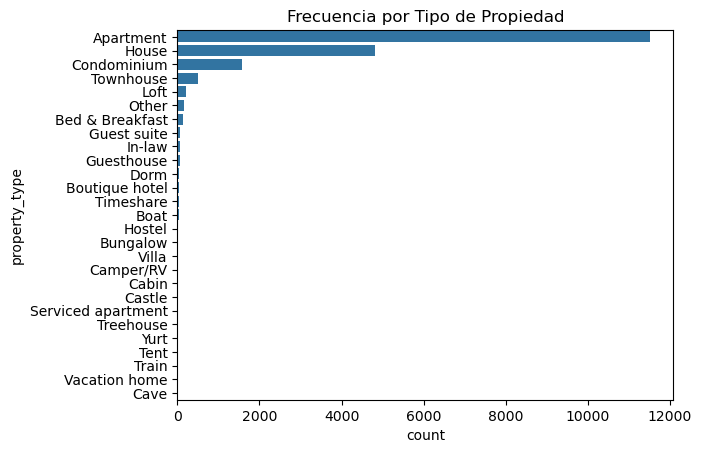

In [7]:
print(dataset['property_type'].value_counts())
sns.countplot(y=dataset['property_type'], order=dataset['property_type'].value_counts().index)
plt.title('Frecuencia por Tipo de Propiedad')
plt.show()

#Analizando la frecuencia de aparicion de cada property type para ver posibles sesgos

Categorías restantes:
property_type
Apartment          11509
House               4803
Condominium         1568
Townhouse            501
Loft                 205
Other                171
Bed & Breakfast      135
Otros                 74
Guest suite           65
In-law                64
Guesthouse            55
Dorm                  49
Boutique hotel        47
Timeshare             33
Boat                  30
Name: count, dtype: int64
Total de filas restantes: 19309


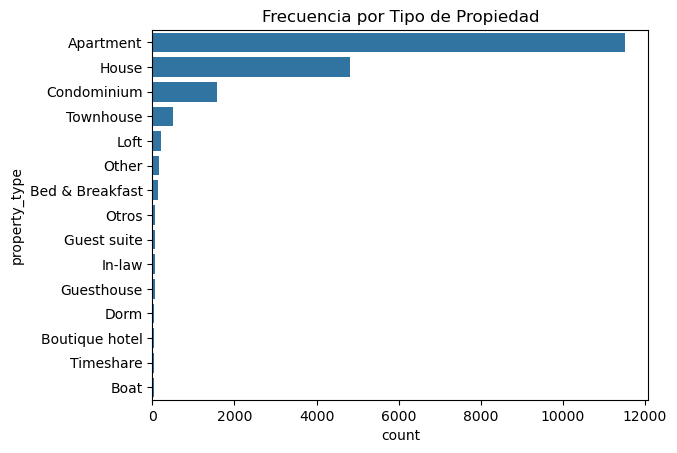

In [8]:
#Como nos quedan muchos tipos de propiedades que no son significativas para el analisis las agrupamos en la categoria otros
Frec_categorias = dataset['property_type'].value_counts()
categorias_menores = Frec_categorias[(Frec_categorias < 20) & (Frec_categorias.index != 'Otros')].index
dataset['property_type'] = dataset['property_type'].apply(lambda x: 'Otros' if x in categorias_menores else x)

print(f"Categorías restantes:\n{dataset['property_type'].value_counts()}")
print(f"Total de filas restantes: {dataset.shape[0]}")
sns.countplot(y=dataset['property_type'], order=dataset['property_type'].value_counts().index)
plt.title('Frecuencia por Tipo de Propiedad')
plt.show()

#viendo los valores obtenidos se decidio eliminar los valores menores a 20

Relación entre tipo de propiedad y precio:
                       mean  median  count
property_type                             
Boat             342.266667   229.0     30
Timeshare        286.272727   250.0     33
Other            252.865497   150.0    171
Loft             234.892683   175.0    205
Condominium      224.612245   160.0   1568
Townhouse        221.085828   130.0    501
House            216.681449   120.0   4803
Boutique hotel   193.680851   150.0     47
Apartment        181.300461   135.0  11509
Otros            159.662162   118.0     74
Guesthouse       153.181818   140.0     55
In-law           139.921875   130.0     64
Bed & Breakfast  137.540741   120.0    135
Guest suite      130.353846   120.0     65
Dorm              59.163265    54.0     49


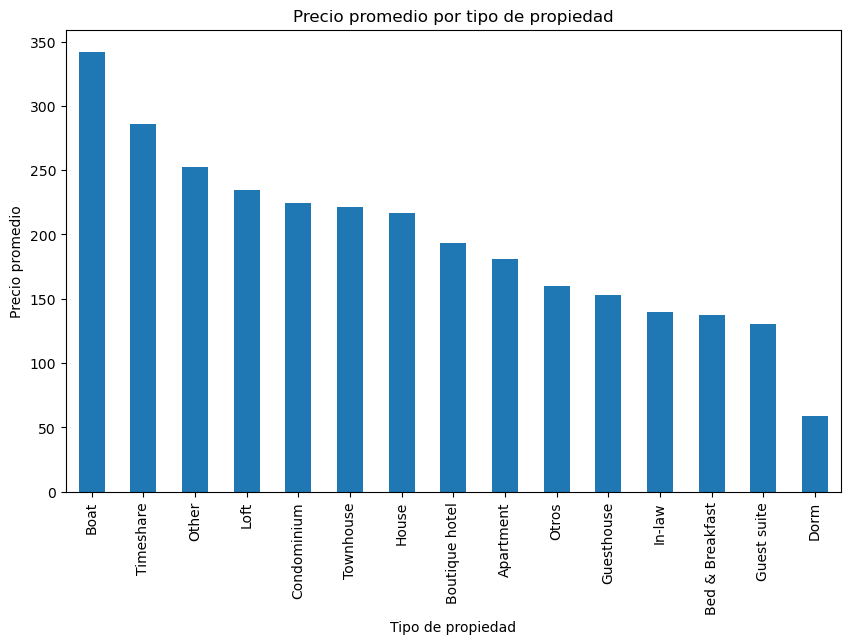

In [9]:
precio_x_propiedad= dataset.groupby('property_type')['price'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
print("Relación entre tipo de propiedad y precio:")
print(precio_x_propiedad)
precio_x_propiedad['mean'].plot(kind='bar', figsize=(10, 6), title='Precio promedio por tipo de propiedad', ylabel='Precio promedio', xlabel='Tipo de propiedad')
plt.show()

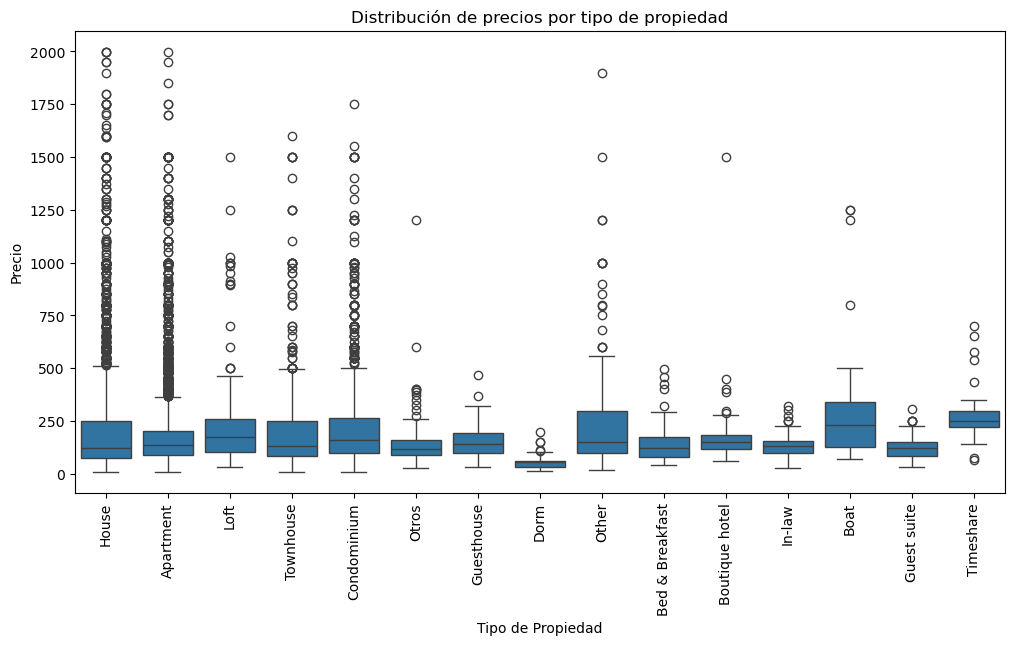

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='price', data=dataset)
plt.xticks(rotation=90)
plt.title('Distribución de precios por tipo de propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio')
plt.show()

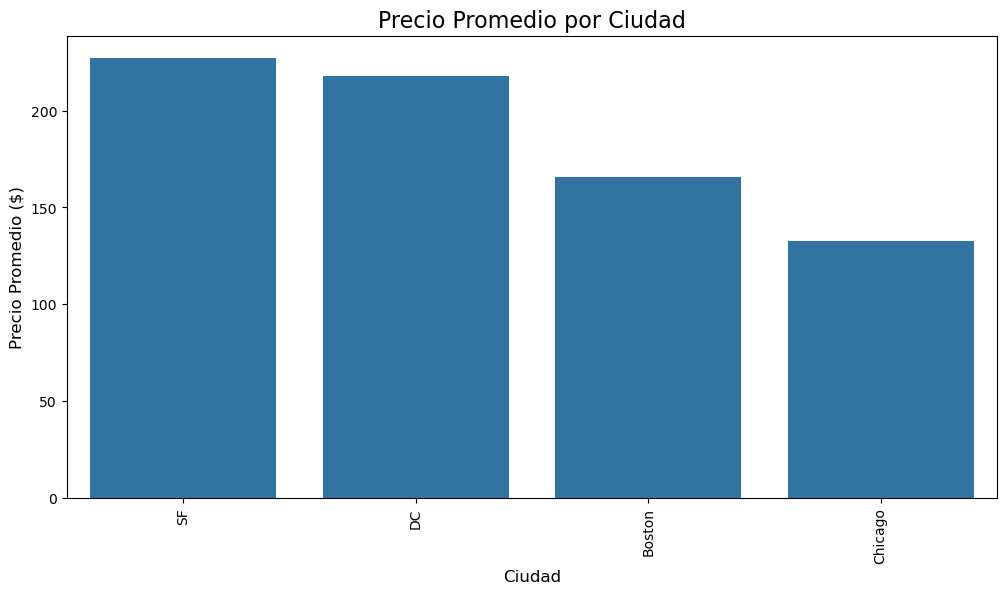

In [11]:
# Precio promedio por ciudad
plt.figure(figsize=(12, 6))
avg_price_city = dataset.groupby('city')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_city.index, y=avg_price_city.values)
plt.title('Precio Promedio por Ciudad', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Precio Promedio ($)', fontsize=12)
plt.xticks(rotation=90)
plt.show()


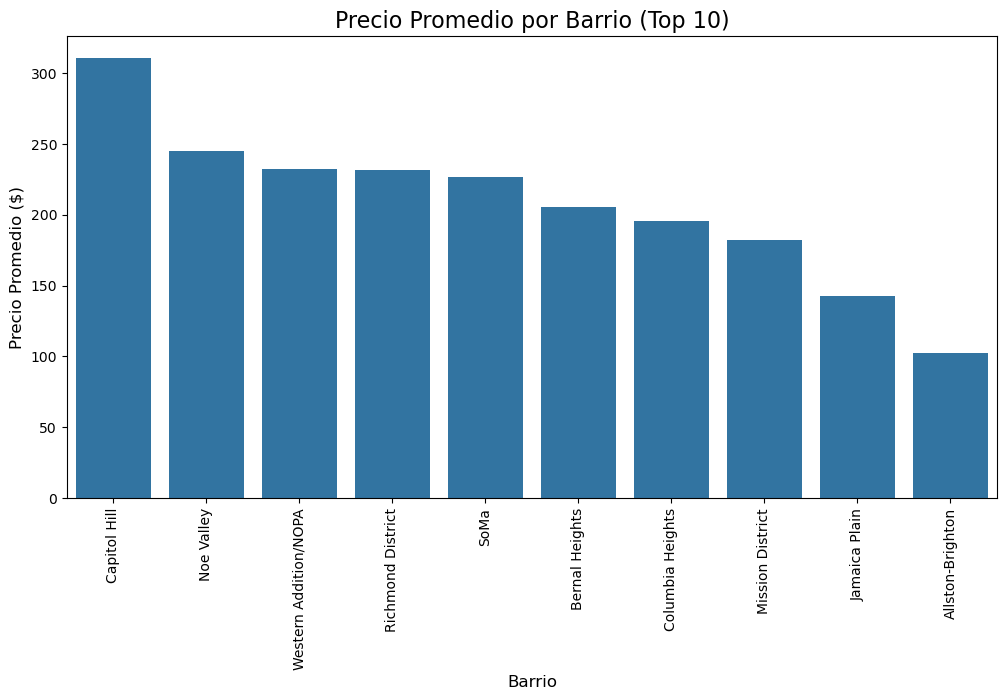

In [12]:
# Precio promedio por barrio 
plt.figure(figsize=(12, 6))
top_neighbourhoods = dataset['neighbourhood'].value_counts().head(10).index
avg_price_neighbourhood = dataset[dataset['neighbourhood'].isin(top_neighbourhoods)].groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

sns.barplot(x=avg_price_neighbourhood.index, y=avg_price_neighbourhood.values)
plt.title('Precio Promedio por Barrio (Top 10)', fontsize=16)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Precio Promedio', fontsize=12)
plt.xticks(rotation=90)
plt.show()

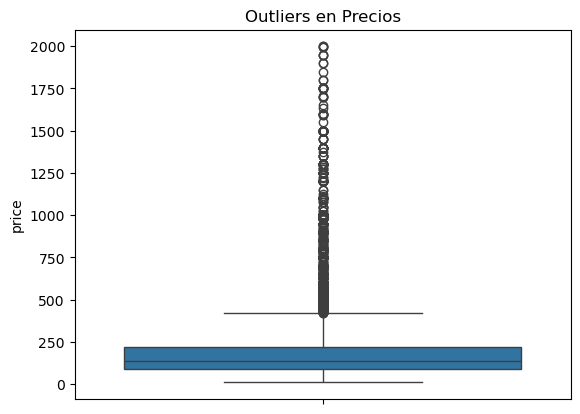

In [13]:
#vemos la distribucion de la variable precio
sns.boxplot(dataset['price'])
plt.title('Outliers en Precios')
plt.show()


Filas antes del filtrado: 19309
Filas después del filtrado: 18899


C:\Users\admin\AppData\Local\Temp\ipykernel_18216\3155516395.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, y='price', palette='Blues')


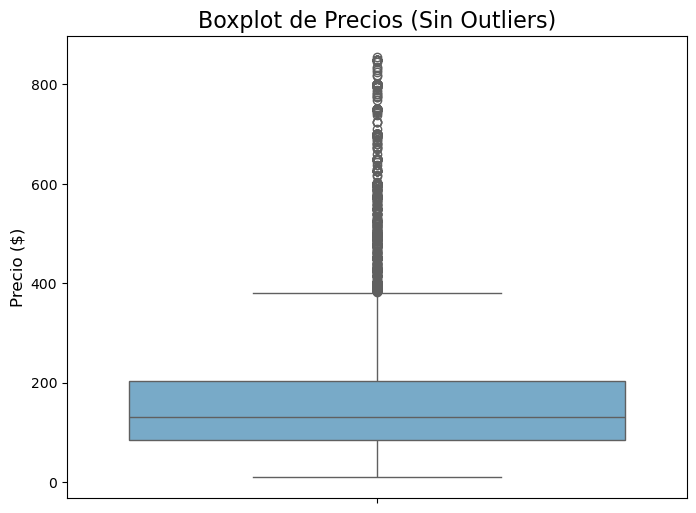

In [14]:
#Como vemos que tenemos muchos outliers eliminamos los quantiles superiores a 90% y menores a 10%
Q1 = dataset['price'].quantile(0.1)
Q3 = dataset['price'].quantile(0.9)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = dataset[(dataset['price'] >= lower_bound) & (dataset['price'] <= upper_bound)]

print(f"Filas antes del filtrado: {dataset.shape[0]}")
print(f"Filas después del filtrado: {filtered_data.shape[0]}")

plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data, y='price', palette='Blues')
plt.title('Boxplot de Precios (Sin Outliers)', fontsize=16)
plt.ylabel('Precio ($)', fontsize=12)
plt.show()

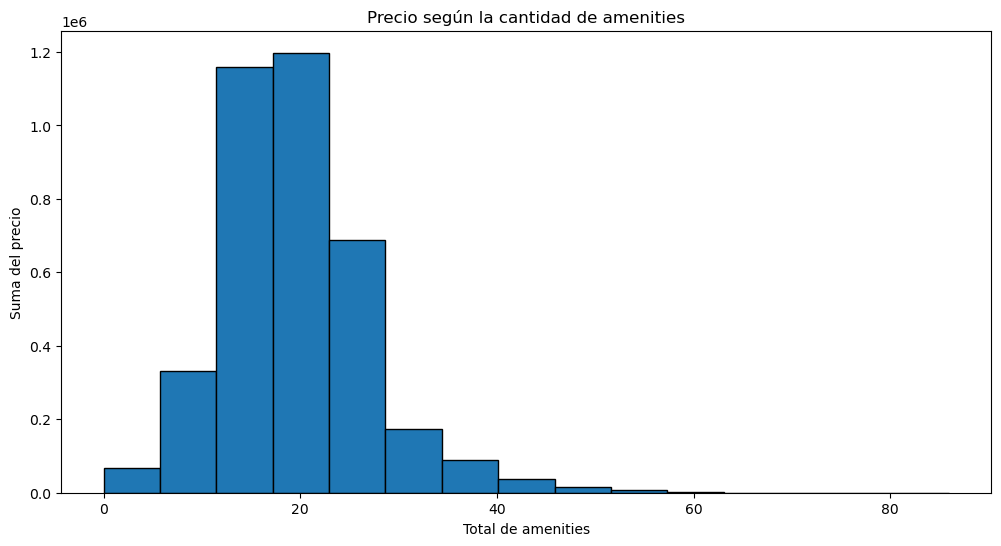

In [15]:
#Calculamos cuantas amenities hay por propiedad contando la cantidad de comas que aparecen en el string.
#Con ese dato hacemos la comparacion entre amenities y precio para ver si hay correlacion alguna.
if 'total_amenities' not in dataset.columns:
    dataset['amenities'] = dataset['amenities'].astype(str)
    dataset['total_amenities'] = dataset['amenities'].apply(lambda x: len(x.split(',')) if x != '{}' else 0)

plt.figure(figsize=(12, 6))
plt.hist(dataset['total_amenities'], bins=15, weights=dataset['price'], edgecolor='black')
plt.title('Precio según la cantidad de amenities')
plt.xlabel('Total de amenities')
plt.ylabel('Suma del precio')
plt.show()

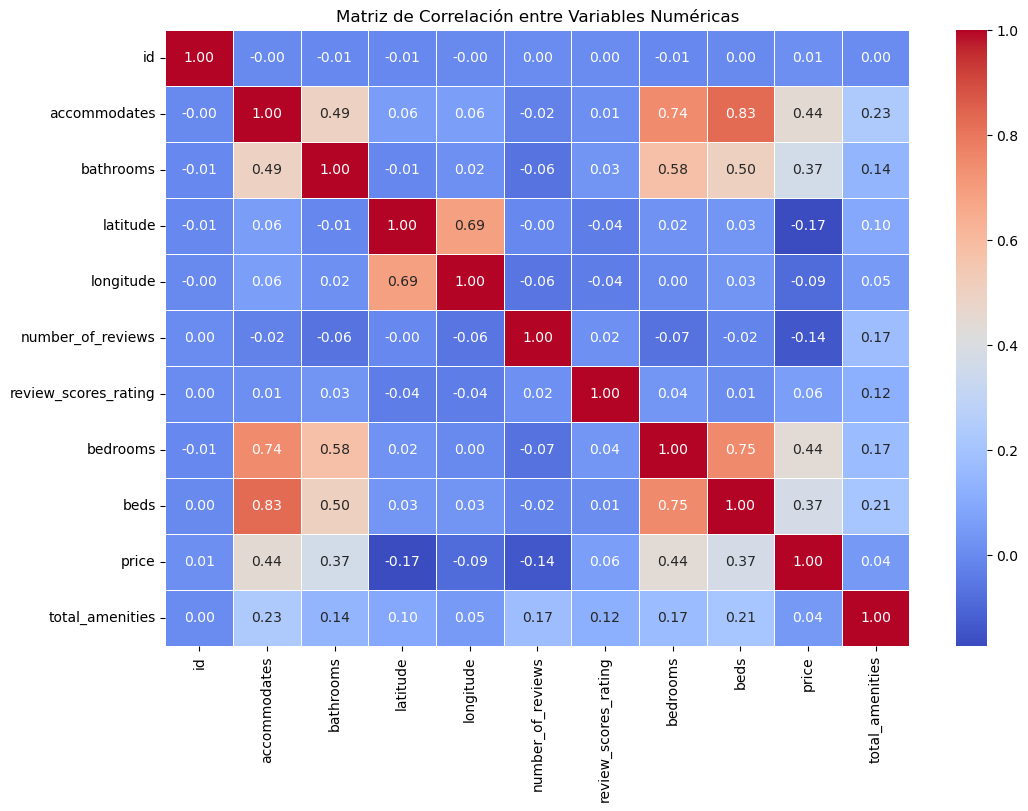

In [16]:
numerical_data = dataset.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

In [17]:
#Borramos todas las columnas que con el analisis previo vimos que no eran de utilidad
#Beds se borra ya que esta correlacionado con bedrooms y se puede hacer mas liviano el dataset
#Columnas como ID, number of reviews, review scores, etc que no muestran correlacion alguna las eliminamos.

columns_to_drop = ['id','description', 'first_review', 'host_has_profile_pic', 'host_identity_verify', 'host_response_rate', 'host_since', 
    'instant_bookable', 'last_review', 'latitude', 'longitude', 'zipcode', 'thumbnail_url','Bed_type','Beds' ]
dataset = dataset.drop(columns=columns_to_drop, errors='ignore')
dataset.head(5)

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,name,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,price,total_amenities
0,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,t,Beautiful Flat in the Heart of SF!,Lower Haight,0,94.722372,2.0,2.0,750.0,15
1,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,Great studio in midtown DC,Columbia Heights,4,40.000000,0.0,1.0,115.0,12
2,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,t,Comfort Suite San Francisco,Noe Valley,3,100.000000,1.0,1.0,85.0,10
3,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,f,Cozy Garden Studio - Private Entry,Richmond District,159,99.000000,1.0,1.0,120.0,21
4,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.5,Real Bed,strict,True,DC,t,Charming 2 bdrm in trendy U/14th streets w/par...,U Street Corridor,13,89.000000,2.0,3.0,200.0,25


In [18]:
# Crear variables dummies
property_dummies = pd.get_dummies(dataset['property_type'], prefix='property', drop_first=True)
room_dummies = pd.get_dummies(dataset['room_type'], prefix='room', drop_first=True)
city_dummies = pd.get_dummies(dataset['city'], prefix='city', drop_first=True)
dataset = dataset.join([property_dummies, room_dummies, city_dummies])

dataset = dataset.drop([ 'property_type', 'room_type', 'amenities', 'bed_type', 'cancellation_policy',
    'city', 'host_identity_verified', 'name', 'neighbourhood'], axis=1)


In [19]:
dataset = dataset.dropna()
print(f"Después de limpiar: Filas: {dataset.shape[0]}, Columnas: {dataset.shape[1]}")
dataset.head(5)

Después de limpiar: Filas: 19309, Columnas: 28


,accommodates,bathrooms,cleaning_fee,number_of_reviews,review_scores_rating,bedrooms,beds,price,total_amenities,property_Bed & Breakfast,...,property_Loft,property_Other,property_Otros,property_Timeshare,property_Townhouse,room_Private room,room_Shared room,city_Chicago,city_DC,city_SF
0,4,1.0,True,0,94.722372,2.0,2.0,750.0,15,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,True,4,40.000000,0.0,1.0,115.0,12,False,...,False,False,False,False,False,False,False,False,True,False
2,2,1.0,True,3,100.000000,1.0,1.0,85.0,10,False,...,False,False,False,False,False,True,False,False,False,True
3,2,1.0,True,159,99.000000,1.0,1.0,120.0,21,False,...,False,False,False,False,False,True,False,False,False,True
4,6,1.5,True,13,89.000000,2.0,3.0,200.0,25,False,...,False,False,False,False,False,False,False,False,True,False


In [20]:
y = dataset['price'].values  # Variable objetivo
X = dataset.drop(['price'], axis=1)  # Características

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("train=",x_train.shape, y_train.shape)
print("test=",x_test.shape, y_test.shape)

train= (13516, 27) (13516,)
test= (5793, 27) (5793,)


In [22]:
scaler = preprocessing.StandardScaler().fit(x_train)
xtrain_scal =scaler.transform(x_train)
xtest_scal =scaler.transform(x_test)

In [23]:
Lr= LinearRegression()
Lr.fit(xtrain_scal, y_train)
y_pred = Lr.predict(xtest_scal)
np.sqrt(mean_squared_error(y_test, y_pred))

162.85645703784138

In [24]:
svreg = SVR()
param_grid = {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100],'gamma': [0.01, 0.1, 1]}
random_search = RandomizedSearchCV(svreg, param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error', refit=True)
random_search.fit(xtrain_scal, y_train)

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': [1, 10, 100],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf']},
                   scoring='neg_mean_squared_error')

In [25]:
print("Mejores hiperparámetros:", random_search.best_params_)
y_pred_best_random = random_search.predict(xtest_scal)
mse_best_random = mean_squared_error(y_test, y_pred_best_random)
print(mse_best_random)

Mejores hiperparámetros: {'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
27120.18424640839


In [26]:
svm_model = SVR()
new_param_grid = { 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
new_random_search = RandomizedSearchCV(svm_model, new_param_grid, n_iter=15, cv=3, scoring='neg_mean_squared_error', refit=True, verbose=2, n_jobs=-1)
new_random_search.fit(xtrain_scal, y_train.ravel())

Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   scoring='neg_mean_squared_error', verbose=2)

In [27]:
print("Nuevos mejores hiperparámetros:", new_random_search.best_params_)
y_pred_new_best = new_random_search.predict(xtest_scal)
mse_new_best = mean_squared_error(y_test, y_pred_new_best)
print("Mean Squared Error (MSE) con los nuevos mejores hiperparámetros:", mse_new_best)

Nuevos mejores hiperparámetros: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Mean Squared Error (MSE) con los nuevos mejores hiperparámetros: 29352.80851206294
